In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
tf.__version__

'2.15.0'

In [ ]:
!ls ./drive/MyDrive/Colab Notebooks/diabetes.csv

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
data.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
type(data)

pandas.core.frame.DataFrame

**ENCONTRAR CORRELACIONES-UTILIZAMOS REDES NEURONALES PORQUE NO TENGO QUE LIMPIAR TANTO DATA Y NO ME IMPACTA MUCHO LAS COLUMNAS QUE NO TIENEN CORRELACION**

In [33]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**PARA USAR LOS DATOS NECESITO QUE SEAN NUMERICOS NO STRINGS**

In [39]:
data.shape

(768, 9)

In [40]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [41]:
x.shape

(768, 8)

In [42]:
y.shape

(768,)

**BILBIOTECA SKLEARN PARA NORMALIZAR**

In [43]:
from sklearn.preprocessing import StandardScaler
normalizer= StandardScaler()

In [44]:
x=normalizer.fit_transform(x)

In [45]:
x.shape

(768, 8)

**DIVIDIR EN DATASET ENTRENAMIENTO Y TESTING**

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [51]:
x_train.shape

(614, 8)

In [53]:
x_test.shape

(154, 8)

**ARMAR MODELO**

**CORREGIR VALORES RANDOM**

In [54]:
np.random.seed(123)
tf.random.set_seed(123)

In [56]:
def build_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],))) #capa entrada
#--------------------------------------------------------------------IMPLEMENTAR TECNICA DE DROPOUT ENTRE CADA CAPA PORQUE MI DATA ES PEQUEÑA Y SE SOBREAJUSTA A DATA  MI MODELO
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(32, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.3))
  #model.add(tf.keras.layers.Dense(8, activation="relu"))
  #model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
#--------------------------------------------------------------------Ahora que compile y genere grafo -
#-------------------------------------------------------------------- DECIRLE FUNCION DE PERDIDA O COSTE, OPTIMIZADOR Y METRICAS DE EVALUACION DE MODELO (EN ESTE CASO ES REGRESIÓN)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #MOSTRAR ESTRUCTURAS CON ENTRADA Y SALIDA EN CADA EPOCH
  model.summary()
  return model

In [57]:
model= build_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ENTRENARLO**

In [58]:
history= model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
77/77 [==============================] - 2s 9ms/step - loss: 0.6747 - accuracy: 0.6173 - val_loss: 0.5671 - val_accuracy: 0.7468
Epoch 2/100
77/77 [==============================] - 0s 6ms/step - loss: 0.6012 - accuracy: 0.6743 - val_loss: 0.5077 - val_accuracy: 0.7792
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7166 - val_loss: 0.4853 - val_accuracy: 0.7792
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7264 - val_loss: 0.4804 - val_accuracy: 0.7922
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7492 - val_loss: 0.4818 - val_accuracy: 0.7987
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7508 - val_loss: 0.4787 - val_accuracy: 0.8052
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7606 - val_loss: 0.4770 - val_accuracy: 0.7987
Epoch 8/100
7

**PLOTEAR**

In [59]:
import matplotlib.pyplot as plt

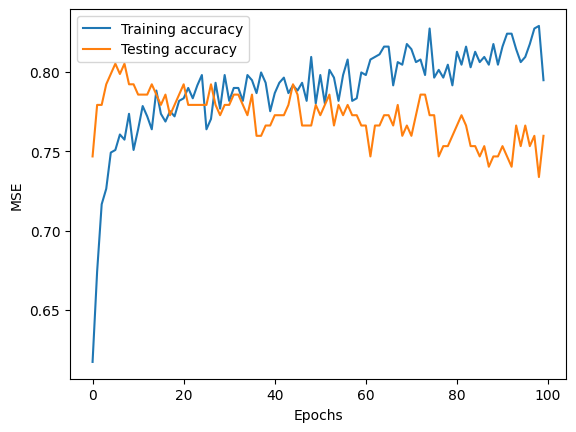

In [60]:
def plot_history(hist):
  plt.figure()
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.plot(hist.epoch, hist.history["accuracy"], label="Training accuracy")
  plt.plot(hist.epoch, hist.history["val_accuracy"], label="Testing accuracy")
  plt.legend()
  plt.show()

plot_history(history)

**CUANDO SE OVERFITTING HACER EARLY STOPPING**

In [61]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

In [62]:
history= model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=300, batch_size=8, callbacks=[early_stopping])

Epoch 1/300
77/77 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8160 - val_loss: 0.6009 - val_accuracy: 0.7468
Epoch 2/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.7997 - val_loss: 0.5993 - val_accuracy: 0.7532
Epoch 3/300
77/77 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8208 - val_loss: 0.5970 - val_accuracy: 0.7662
Epoch 4/300
77/77 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8257 - val_loss: 0.5960 - val_accuracy: 0.7597
Epoch 5/300
77/77 [==============================] - 0s 5ms/step - loss: 0.4010 - accuracy: 0.7980 - val_loss: 0.6114 - val_accuracy: 0.7662
Epoch 6/300
77/77 [==============================] - 0s 5ms/step - loss: 0.4090 - accuracy: 0.8143 - val_loss: 0.5939 - val_accuracy: 0.7597
Epoch 7/300
77/77 [==============================] - 0s 5ms/step - loss: 0.4045 - accuracy: 0.8046 - val_loss: 0.5936 - val_accuracy: 0.7597
Epoch 8/300
7

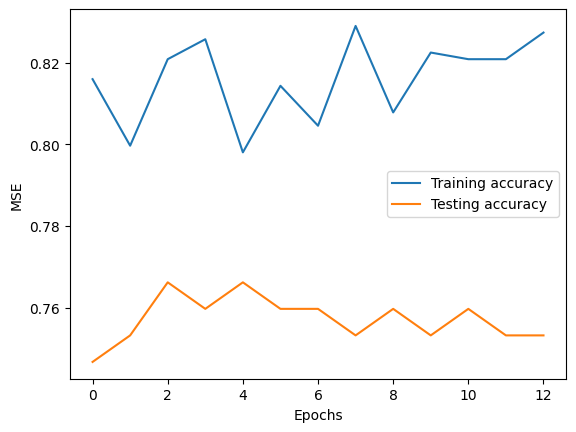

In [63]:
def plot_history(hist):
  plt.figure()
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.plot(hist.epoch, hist.history["accuracy"], label="Training accuracy")
  plt.plot(hist.epoch, hist.history["val_accuracy"], label="Testing accuracy")
  plt.legend()
  plt.show()

plot_history(history)

**CORREGIR LOS VALORES RANDOM**